In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import glob
from collections import Counter

In [2]:
articles = []
for name in glob.glob('articles/*'): 
    file = open(name,'r')
    articles.append(file.read())

In [3]:
with open('spanish.txt', 'r') as f:
    text_lines = f.read().splitlines()

In [4]:
cv = CountVectorizer(stop_words=text_lines)
data_cv = cv.fit_transform(articles)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.head()

,000,02,028,03,05,061,07,08,0800,09,...,votantes,voy,vuelven,wolf,zelmar,área,órgano,últimas,último,única
0,0,0,0,0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,0,2,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,1,1,...,2,0,1,0,0,1,0,2,1,0
3,1,1,0,1,1,0,0,0,1,1,...,2,0,1,0,0,1,0,2,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1


In [5]:
data = data_dtm.transpose()
data.head()

,0,1,2,3,4
000,0,0,1,1,0
02,0,0,1,1,0
028,0,2,0,0,0
03,0,0,1,1,0
05,0,0,1,1,0


In [6]:
data.columns

RangeIndex(start=0, stop=5, step=1)

In [11]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# Print the top 10 words by year
for article, top_words in top_dict.items():
    print(article)
    print(', '.join([word for word, count in top_words[0:9]]))

0
cédula, lacalle, personas, policía, identidad, uruguay, montevideo, noticias, leal
1
guardias, seguridad, montevideo, interior, privada, ministerio, noticias, publicidad, sigue
2
seguridad, member, observador, pública, 19, gobierno, opinión, dijo, políticas
3
seguridad, member, observador, pública, 19, gobierno, opinión, dijo, políticas
4
educación, ley, foto, años, ministerio, lacalle, seguridad, gobierno, régimen


In [12]:
threshold = 2
words = []
for article in data.columns:
    top = [word for (word, count) in top_dict[article]]
    for t in top:
        words.append(t)

most_common = [word for word, count in Counter(words).most_common() if count > threshold]
most_common

['uruguay', 'seguridad', 'gobierno', 'montevideo', 'noticias', 'pou', 'va']

0 0
1 1
2 2
3 3
4 4


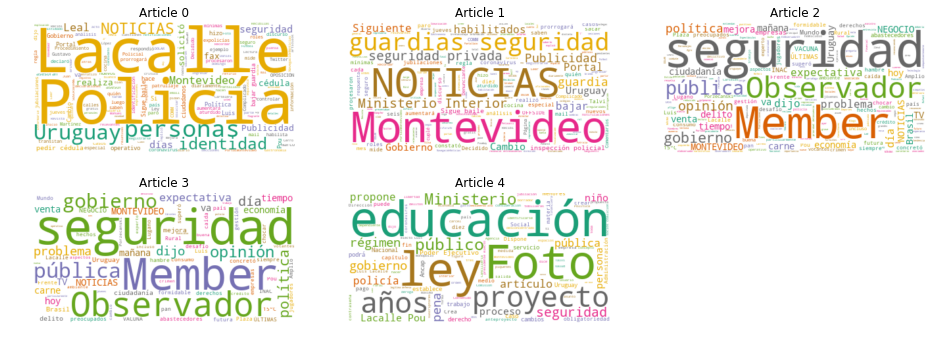

In [17]:
from wordcloud import WordCloud
 
wc = WordCloud(stopwords=text_lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
 
      
# Create subplots for each article
for index, article in enumerate(data.columns):
    wc.generate(articles[article])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Article {}".format(index))
plt.show()